In [87]:
import pandas as pd 
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt 

In [88]:
df = pd.read_csv(r"D:\profile\thambnils\Moveis\moves\Bengaluru_House_Data.csv")

In [89]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [90]:
df.shape

(13320, 9)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [92]:
for column in df.columns:
    print (df[column].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [93]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [94]:
df.drop(columns=["area_type","society","availability","balcony"],inplace=True)

In [95]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [96]:
df["location"].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [97]:
df["location"] = df["location"].fillna("Whitefield")

In [98]:
df["size"].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [99]:
df["size"] = df["size"].fillna("2 BHK")

In [100]:
df["bath"].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [101]:
df["bath"] = df["bath"].fillna(df["bath"].median())

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [103]:
df["bhk"] = df["size"].str.split().str.get(0).astype(int)

In [104]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [105]:
def conver_range(x):
    
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float (temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [106]:
df["total_sqft"] = df["total_sqft"].apply(conver_range)

In [107]:
df["price_per_sqft"] = df["price"] *100000 / df["total_sqft"]

In [108]:
df["price_per_sqft"]

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [109]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [110]:
df["location"].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [111]:
df["location"]  = df["location"].apply(lambda x: x.strip())
loc_count = df["location"].value_counts()


In [112]:
loc_count_10 = loc_count[loc_count<=10]
loc_count_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [113]:
df["location"] = df["location"].apply( lambda x: 'other' if x in loc_count_10 else x )

In [114]:
df["location"].value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [115]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [116]:
(df["total_sqft"]/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [117]:
df = df[((df["total_sqft"] / df["bhk"]) >=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [118]:
df.shape

(12530, 7)

In [119]:
def remove_outliner(x):
    x_output = pd.DataFrame()
    for key,subdf in x.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        gen =  subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        x_output = pd.concat([x_output,gen],ignore_index = True)
    return x_output
df = remove_outliner(df)
df.describe()
        
    

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [120]:


def bhk_remove_outliner(x):
    exclude_indices = np.array([])
    for location, location_x in x.groupby("location"):
        bhk_stats = {}  # Define bhk_stats correctly
        for bhk, bhk_x in location_x.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_x.price_per_sqft),
                'std': np.std(bhk_x.price_per_sqft),
                'count': bhk_x.shape[0]
            }
        # Looping again to apply the filtering
        for bhk, bhk_x in location_x.groupby("bhk"):
            stats = bhk_stats.get(bhk - 1)  # Corrected the variable name to bhk_stats
            if stats and stats["count"] > 5:
                # Assuming price_per_sqft is a column in bhk_x DataFrame
                exclude_indices = np.append(exclude_indices, bhk_x[bhk_x.price_per_sqft < stats["mean"]].index.values)
    return x.drop(exclude_indices, axis="index")

# Applying the function to the DataFrame
df = bhk_remove_outliner(df)

In [121]:
df.shape

(7361, 7)

In [122]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [123]:
df.drop(columns=["size","price_per_sqft"],inplace=True)

In [124]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
location_en = LabelEncoder()
df["location"]= location_en.fit_transform(df["location"])

In [127]:
df.head()

,location,total_sqft,bath,price,bhk
0,0,2850.0,4.0,428.0,4
1,0,1630.0,3.0,194.0,3
2,0,1875.0,2.0,235.0,3
3,0,1200.0,2.0,130.0,3
4,0,1235.0,2.0,148.0,2


In [128]:
x = df.drop(columns=['price'])
y = df["price"]

In [129]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [130]:
x = pd.DataFrame(x, columns=df.columns)

In [131]:
print (x)

      location  total_sqft      bath     price       bhk
0    -1.881259    1.562922  1.534265  3.524109  1.613549
1    -1.881259    0.153695  0.545582  1.016890  0.537411
2    -1.881259    0.436696 -0.443101  1.456189  0.537411
3    -1.881259   -0.342999 -0.443101  0.331155  0.537411
4    -1.881259   -0.302571 -0.443101  0.524018 -0.538727
...        ...         ...       ...       ...       ...
7356  1.251011   -0.342999 -0.443101 -0.311721 -0.538727
7357  1.251011    0.350063 -1.431784  1.081178 -1.614865
7358  1.251011   -0.166269 -0.443101  0.116863 -0.538727
7359  1.251011   -0.791180 -1.431784 -0.783164 -1.614865
7360  1.251011    2.429249  2.522949  3.224100  1.613549

[7361 rows x 5 columns]


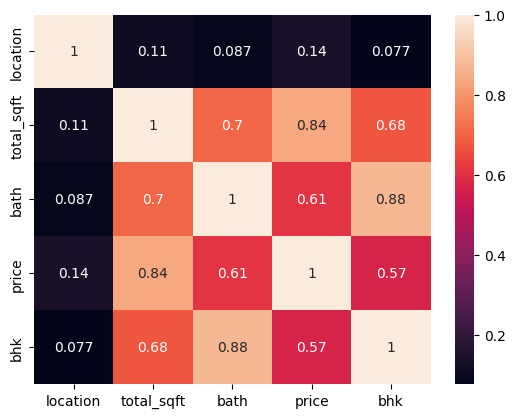

In [132]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [133]:
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (7361, 5)
Shape of y: (7361,)


In [135]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor  


In [86]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [139]:
rf_test = RandomForestRegressor()
rf_test.fit(x_train,y_train)
rf_test.score(x_test,y_test)*100 ,rf_test.score(x_train,y_train)*100

(98.63664546707139, 99.89260802837524)

In [140]:
mean_squared_error(y_test ,rf_test.predict(x_test)),mean_absolute_error(y_test ,rf_test.predict(x_test))

(98.9486364499491, 0.3381367277664625)

In [141]:
x_test

,location,total_sqft,bath,price,bhk
3160,-0.295629,-0.400755,-0.443101,-0.611730,-0.538727
5244,0.900093,-0.264452,-0.443101,-0.461726,-0.538727
5173,0.809114,-0.386893,-0.443101,-0.003462,-0.538727
3147,-0.295629,-0.211318,-0.443101,-0.226004,-0.538727
6527,1.251011,-0.181285,0.545582,-0.236719,0.537411
...,...,...,...,...,...
6997,1.251011,-0.481612,-0.443101,-0.376009,-0.538727
880,-1.335386,-0.342999,-0.443101,-0.579587,-0.538727
4110,0.276238,0.211450,0.545582,0.063290,0.537411
6439,1.251011,-0.342999,0.545582,-0.268863,0.537411


In [144]:
rf_test.predict([[-0.295629,	-0.400755,	-0.443101,	-0.611730,	-0.538727]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([42.])

In [143]:
y_test.head()

3865    42.00
6504    56.00
6417    98.77
3849    78.00
8615    77.00
Name: price, dtype: float64